In [2]:
import os
from utils import *
import tensorflow as tf
00
from cyclegan import CycleGAN

In [3]:
gan = CycleGAN(learning_rate=1e-6)
# gan.load_weights('saved_weights')

2024-10-16 00:37:48.855534: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-10-16 00:37:48.855560: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-16 00:37:48.855565: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-16 00:37:48.855581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-16 00:37:48.855590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
BATCH_SIZE =  8

trainA_path = os.path.join(PATH, 'train_a/*.jpg')
trainB_path = os.path.join(PATH, 'train_b_dalle_resizes/*.jpg')

trainA = tf.data.Dataset.list_files(trainA_path)
trainB = tf.data.Dataset.list_files(trainB_path)

trainA = trainA.map(load_image).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
trainB = trainB.map(load_image).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [5]:
%%time
gan.train(trainA, trainB, epochs=5, load_from=None, save_to="saved_weights/new2/")


Epoch 1/5


Training Epoch 1:  27%|██████▎                | 6/22 [00:35<01:35,  5.99s/batch]



Epoch 2/5


Training Epoch 2:  27%|██████▎                | 6/22 [00:10<00:28,  1.77s/batch]



Epoch 3/5


Training Epoch 3:  27%|██████▎                | 6/22 [00:09<00:26,  1.66s/batch]



Epoch 4/5


Training Epoch 4:  27%|██████▎                | 6/22 [00:09<00:25,  1.60s/batch]



Epoch 5/5


Training Epoch 5:  27%|██████▎                | 6/22 [00:09<00:25,  1.61s/batch]


Weights saved.

CPU times: user 38.1 s, sys: 36.7 s, total: 1min 14s
Wall time: 1min 16s


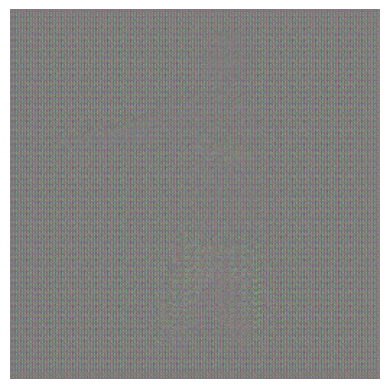

In [10]:
result = gan.transform_to_ocean('./images/cropped.png')

In [9]:
%%time
gan.train(trainA, trainB, epochs=10, load_from="saved_weights/new2/", save_to="saved_weights/new2/")

Weights loaded from saved_weights/new2/

Epoch 1/10


Training Epoch 1:  27%|██████▎                | 6/22 [00:11<00:30,  1.89s/batch]



Epoch 2/10


Training Epoch 2:  27%|██████▎                | 6/22 [00:09<00:25,  1.62s/batch]



Epoch 3/10


Training Epoch 3:  27%|██████▎                | 6/22 [00:11<00:31,  1.95s/batch]



Epoch 4/10


Training Epoch 4:  27%|██████▎                | 6/22 [00:10<00:28,  1.76s/batch]



Epoch 5/10


Training Epoch 5:  27%|██████▎                | 6/22 [00:10<00:27,  1.71s/batch]



Epoch 6/10


Training Epoch 6:  27%|██████▎                | 6/22 [00:09<00:26,  1.65s/batch]



Epoch 7/10


Training Epoch 7:  27%|██████▎                | 6/22 [00:10<00:27,  1.75s/batch]



Epoch 8/10


Training Epoch 8:  27%|██████▎                | 6/22 [00:09<00:26,  1.64s/batch]



Epoch 9/10


Training Epoch 9:  27%|██████▎                | 6/22 [00:08<00:23,  1.48s/batch]



Epoch 10/10


Training Epoch 10:  27%|██████                | 6/22 [00:08<00:23,  1.49s/batch]


Weights saved.

CPU times: user 27.5 s, sys: 1min 6s, total: 1min 33s
Wall time: 1min 42s
